In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score

sns.set()

In [7]:
y_test = pd.read_csv('../processed/y_test.csv')
predictions = pd.read_csv('../processed/predictions.csv')
predictions.head()

,Unnamed: 0,pred_1,pred_2
0,0,0.934371,0.934902
1,1,0.902951,0.909765
2,2,0.906280,0.909248
3,3,0.955018,0.956573
4,4,0.964563,0.964068


In [17]:
tr = 0.8
predictions['pred_2_tr'] = np.where(predictions.pred_2 > tr, 1, 0)

In [18]:
pd.crosstab(y_test.good_bad, predictions.pred_2_tr)

pred_2_tr,0,1
good_bad,,
0,1924,6955
1,5746,78632


In [21]:
(y_test.good_bad == predictions.pred_2_tr).mean()

0.8638064702917744

In [35]:
fpr, tpr, trs = roc_curve(y_test.good_bad,predictions.pred_2)

Text(0, 0.5, 'true positive rate')

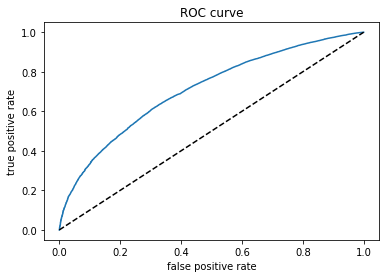

In [36]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [38]:
area_uc = roc_auc_score(y_test.good_bad,predictions.pred_2)
area_uc

0.7088819078059299

In [42]:
roc_auc_score(y_test.good_bad,predictions.pred_1)

0.7087475991576646

## KS - Gini

In [41]:
predictions['y_test'] = y_test.good_bad
predictions.head(1)

,Unnamed: 0,pred_1,pred_2,pred_2_tr,y_test
0,0,0.934371,0.934902,1,1


In [48]:
predictions_sorted = predictions.sort_values('pred_2').reset_index()

predictions_sorted['obs'] = predictions_sorted.index
predictions_sorted['non_defaults'] = predictions_sorted.y_test.cumsum()
predictions_sorted['defaults'] = predictions_sorted.obs - predictions_sorted.non_defaults

predictions_sorted['obs_pct'] = predictions_sorted.obs / predictions_sorted.shape[0]
predictions_sorted['non_defaults_pct'] = predictions_sorted.non_defaults / predictions_sorted.non_defaults.max()
predictions_sorted['defaults_pct'] = predictions_sorted.defaults / predictions_sorted.defaults.max()

Text(0.5, 1.0, 'Gini')

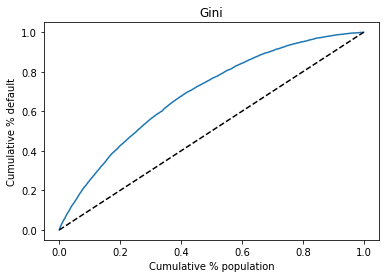

In [51]:
plt.plot(predictions_sorted.obs_pct,predictions_sorted.defaults_pct)
plt.plot(predictions_sorted.obs_pct,predictions_sorted.obs_pct,linestyle='--',color='k')
plt.xlabel('Cumulative % population')
plt.ylabel('Cumulative % default')
plt.title('Gini')

In [53]:
gini = area_uc * 2 -1
gini

0.4177638156118597

In [54]:
predictions_sorted.head(1)

,index,Unnamed: 0,pred_1,pred_2,pred_2_tr,y_test,obs,non_defaults,defaults,obs_pct,non_defaults_pct,defaults_pct
0,64010,64010,0.497057,0.512922,0,0,0,0,0,0.0,0.0,0.0


Text(0.5, 1.0, 'Kolmogorov Smirnov')

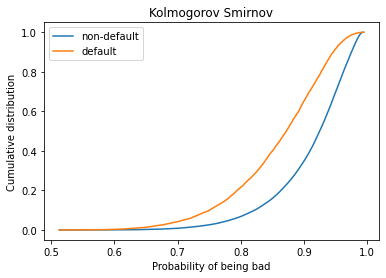

In [62]:
plt.plot(predictions_sorted.pred_2,predictions_sorted.non_defaults_pct,label='non-default')
plt.plot(predictions_sorted.pred_2,predictions_sorted.defaults_pct,label='default')
plt.xlabel('Probability of being bad')
plt.ylabel('Cumulative distribution')
plt.legend()
plt.title('Kolmogorov Smirnov')

In [68]:
ks = max(predictions_sorted.defaults_pct - predictions_sorted.non_defaults_pct)
ks

0.3066840770294175